In [2]:
%matplotlib inline

In [9]:
import pandas as pd
from graph_tool import load_graph
from graph_tool.topology import kcore_decomposition
from graph_helpers import get_subcores, get_degree_ge
from subcore import find_nodes_to_promote

In [4]:
graph_name = 'grqc'
g = load_graph('data/{}/graph.gt'.format(graph_name))

In [5]:
kcore = kcore_decomposition(g)

In [6]:
subcores = get_subcores(g, kcore)

In [7]:
sc_sizes = pd.Series(list(map(len, subcores)))

In [10]:
degge = get_degree_ge(g, kcore)
num_promotable_nodes = pd.Series(list(map(lambda nodes: len(find_nodes_to_promote(g, nodes, kcore, degge)), subcores)))

In [11]:
df = pd.DataFrame.from_dict({'size': sc_sizes, 'n_prom': num_promotable_nodes})

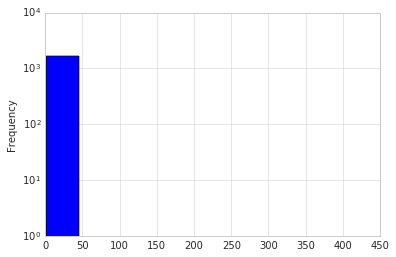

In [12]:
sc_sizes.plot('hist', logy=True)

In [14]:
df['saturation_ratio'] =  (df['size'] - df['n_prom']) / df['size']

In [15]:
df[df['saturation_ratio'] < 1].describe()

,n_prom,size,saturation_ratio
count,1659.000000,1659.000000,1659.000000
mean,1.855937,2.506329,0.086192
std,6.535261,13.800594,0.185137
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,2.000000,0.000000
max,208.000000,442.000000,0.800000


In [17]:
df[df['saturation_ratio'] < 1]['saturation_ratio'].describe()

count    1659.000000
mean        0.086192
std         0.185137
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.800000
Name: saturation_ratio, dtype: float64

In [ ]:
# saturation ratio
# median: 33%
# mean: 28%